# Trabajo computacional 1. Ejercicio 3

**3)** Considere la red  *as-22july06.gml* creada por Mark Newman que contiene la estructura de los sistemas autónomos de internet relevada a mediados de 2006.
    *a.* Encuentre gráficamente la distribución de grado Pk como función de k explorando diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter libre de escala de dicha distribución.

In [1]:
def ldata(archive):      
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize


In [3]:
red_social=ldata("data/as-22july06.gml")
G=nx.read_gml("data/as-22july06.gml")


In [4]:
nx.number_of_edges(G)

48436

In [5]:
nx.number_of_nodes(G)

22963

Se creó una lista que contenga a los nodos de la red, se puede corroborar que el tamaño de la lista coincide con el número de nodos presentado anteriormente.

In [6]:
Nodos=[]               #lista con los nodos
for n in G.nodes():
    Nodos.append(n)

In [7]:
len(Nodos)

22963

De la misma manera, se creó una lista con los grados de los nodos, se corrobora que la lista tiene como tamaño el número total de nodos.

In [8]:
K=[]                              #lista con los grados de los nodos
for n in Nodos:
    K.append(nx.degree(G,n))

In [9]:
len(K)

22963

In [10]:
max(K)

2390

In [11]:
min(K)

1

Los grados de la red van desde 1 a 2390, a continuación se expondrán distintas formas de presentar la distribución de grados del 
grafo:

En primer lugar, se graficó en escala lineal en ambos ejes. La escala del eje *x*, asociado al grado, es grande ya que el grado máximo es 2390. Es de esperar que el número de nodos con tan alta conectividad sea mucho menor a la de nodos de grados más bajos, por lo que es probable que en escala lineal no se obtenga información relevante sobre la distribución. Se observa efectivamente eso en el gráfico 1.



*Nota: Los gráficos mostrados no están normalizados, al estar trabajando con una única red la información proporcionada en cada caso no difiere. Se eligió trabajar con el número de ocurrencias debido a que permite ver de forma directa cuántos nodos -u órdenes de magnitud- hay para cada grado.*

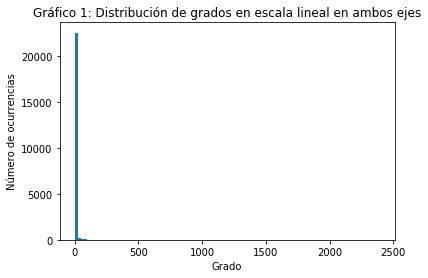

In [12]:
plt.hist(K,log=False, bins= 100) 
plt.ylabel("Número de ocurrencias")
plt.xlabel("Grado")
plt.title("Gráfico 1: Distribución de grados en escala lineal en ambos ejes")
plt.show()


En el gráfico 2 se trabajó con escala lograrítmica en el eje de las abscisas.

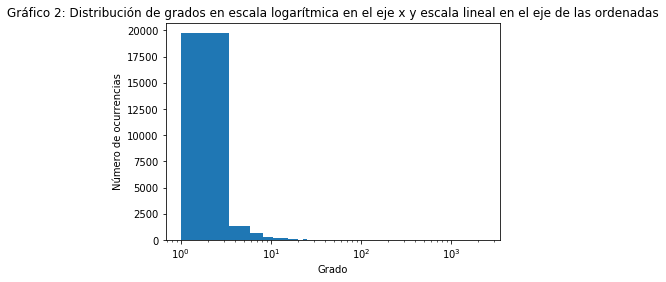

In [13]:
plt.hist(K,bins=1000)      #plot con escala log en x
plt.xscale("log")
plt.ylabel("Número de ocurrencias")
plt.xlabel("Grado")
plt.title("Gráfico 2: Distribución de grados en escala logarítmica en el eje x y escala lineal en el eje de las ordenadas")
plt.show()

En el gráfico 3 se muestra el histograma con escala logarítmica en el eje *y*:

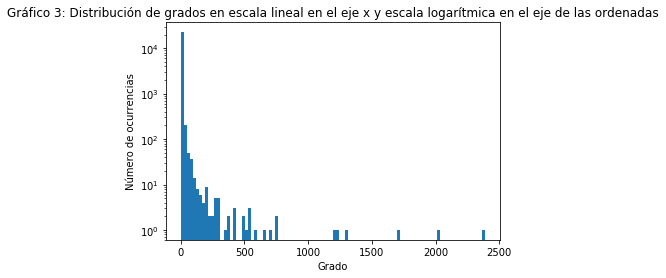

In [14]:
plt.hist(K,log=True, bins= 100)# density=1) #plot con escala log en y
plt.ylabel("Número de ocurrencias")
plt.xlabel("Grado")
plt.title("Gráfico 3: Distribución de grados en escala lineal en el eje x y escala logarítmica en el eje de las ordenadas")
plt.show()

En esta gráfica se permite observar que existen nodos altamente conectados (*k>1000*), pero que son pocos en comparación con los de grado menor a 500 por ejemplo. Al graficar en escala logarítmica se puede ver el orden del número de nodos para los distintos grados, permitiendo así conocer mejor la distribución.


En el gráfico 4 se utilizaron escalas logarítmicas en ambos ejes.

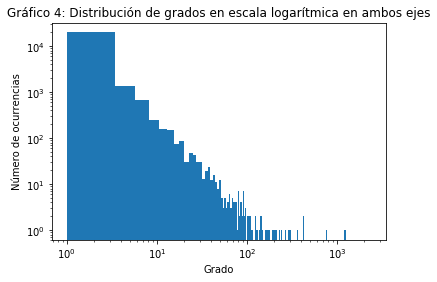

In [15]:
plt.hist(K, bins=1000) #plot con escala log en x y en y   
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Número de ocurrencias")
plt.xlabel("Grado")
plt.title("Gráfico 4: Distribución de grados en escala logarítmica en ambos ejes")
plt.show()

Al trabajar con escala logarítmica se puede observar una tendencia en la distribución, sin embargo para grados grandes veo una meseta de eventos, dado que al tener fijo el tamaño del *bin* diferencia por ejemplo el grado 1000 y 1001, ambos de baja ocurrencia.

A continuación en el gráfico 5 se muestra la distribución de grado con ejes en escala logarítmica, indicando el centro del *bin*. Se observa con mayor claridad la meseta de eventos de alta conectividad.

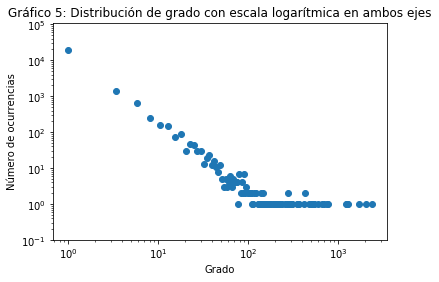

In [16]:
bins=1000

HistLogLog=np.histogram(K,bins=bins)
x=HistLogLog[1]
y=HistLogLog[0]

plt.scatter(x[0:1000],y[0:1000])
plt.title('Gráfico 5: Distribución de grado con escala logarítmica en ambos ejes')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Grado")
plt.ylabel("Número de ocurrencias")
plt.ylim(ymin=0.1)
plt.show()

Al trabajar con el tamaño de las celdas fijo obtenemos la meseta. Se buscará tener un *bineado* logarítmico, de forma tal que el tamaño de la celda de grado aumente en forma logarítmica con el grado,´por lo que se los grados grandes estarán dentro de la misma celda, evitando así tener una meseta marcada. Para ello se crea un vector que tenga los extremos del *bin*. Luego se tuvo que reevaluar el número de ocurrencias para cada *bin*: se cuentan las ocurrencias para los grados correspondientes al intervalo de la celda y se lo divide por el ancho de la misma.

In [17]:
bink=12
b=[0]
for i in range(bink):
    b[i]=b[i-1]+2**i
    b.append(b[i])
B=[]                 ##Este es el que vamos a usar para dar el ancho de los bines
for i in range(bink):
    B.append(b[i])

B     ##Vector  con los bines de bineo logaritmico

[1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095]

A continuación se exhibe los dos histogramas con el bineo lineal y logarítmico en escala logarítmica en ambos ejes.

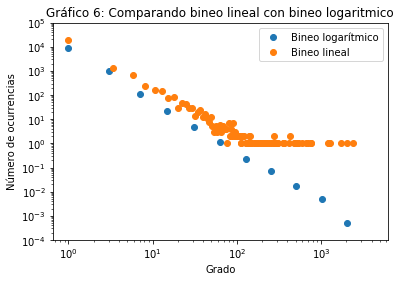

In [18]:
sorted(K)      #Ordenamos la lista de los grados de los nodos de menor a mayor
Pklog=[]       ## Creamos una lista a la que le vamos a agregar la cantidad de nodos en un bin, dividido el ancho del bin. Considerando el vector de bins B
for i in range(bink):
    a=0
    for k in K:
        
        if B[i]<=k<B[i+1]:
            a+=1
    Pklog.append(a/2**(1+i))
    
plt.scatter(B,Pklog, label="Bineo logarítmico")
plt.scatter(x[0:1000],y[0:1000], label="Bineo lineal")
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymax=10**5,ymin=10**(-4))
plt.xlabel("Grado")
plt.legend()
plt.ylabel("Número de ocurrencias")
plt.title('Gráfico 6: Comparando bineo lineal con bineo logaritmico')
plt.show()

Se ve que se logra corregir la meseta señalada en el bineo lineal. Se ve una tendencia lineal en la gráfica con bineado logarítmico.

*b.* Estime el exponente de dicha distribución.

In [55]:
def fiteadora(p,x):
    return p[0]+p[1]*x

def error(p,x,y):
    return fiteadora(p,x)-y


In [108]:
P_ini=[1,-1]
logx=[]
for i in B[:10]:
    logx.append(np.log10(i))
logy=[]
for i in Pklog[:10]:
    logy.append(np.log10(i))

out= optimize.leastsq(error,P_ini,args=(np.array(logx), np.array(logy)),full_output=1)
pfinal = out[0]
covar = out[1]
p0err=np.sqrt( covar[0][0] )
p1err= np.sqrt( covar[1][1] )

pfinal  #valores del ajuste 

array([ 3.87413728, -2.0937111 ])

In [111]:
Y=[]    ##Tiene problemitas el jupyter
for i in logx:
    Y.append(pfinal[0]+pfinal[1]*i)

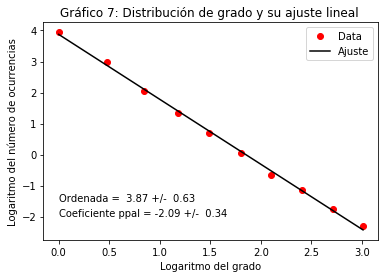

In [121]:
plt.plot(logx, logy, "ro", label="Data")
plt.plot(logx, Y, "k-", label="Ajuste")
plt.xlabel("Logaritmo del grado")
plt.legend()
plt.ylabel("Logaritmo del número de ocurrencias")
plt.title('Gráfico 7: Distribución de grado y su ajuste lineal ')
plt.text(0, -2, 'Coeficiente ppal = %5.2f +/- %5.2f' % (pfinal[1], p1err))
plt.text(0, -1.5, 'Ordenada = %5.2f +/- %5.2f' % (pfinal[0], p0err))
plt.show()

A partir de los valores del ajuste (pfinal) se pueden calcular los parámetros de la ley de potencias: $p_k=Ck^{-\alpha}$ con $\alpha=2.0937111$ y $C=7484.060334354144$ 

In [98]:
PklogAjuste=[] ##Tiene problemitas el jupyter
for i in B:
    PklogAjuste.append(7484.060334354144*i**(-2.0937111))

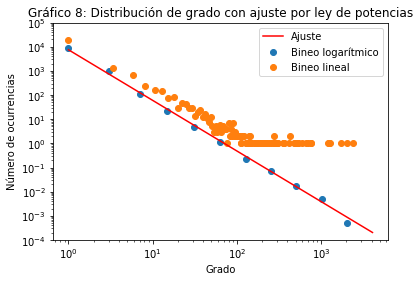

In [104]:
plt.scatter(B,Pklog, label="Bineo logarítmico")
plt.scatter(x[0:1000],y[0:1000], label="Bineo lineal")
plt.plot(B,PklogAjuste, label="Ajuste",c="r")
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymax=10**5,ymin=10**(-4))
plt.xlabel("Grado")
plt.legend()
plt.ylabel("Número de ocurrencias")
plt.title('Gráfico 8: Distribución de grado con ajuste por ley de potencias')
plt.show()